In [1]:
from sklearn import datasets
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import tree

import numpy as np
import pandas as pd
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=1.5)


In [2]:
# Bot check

# HW_ID: bt_ml_sem4
# Бот проверит этот ID и предупредит, если случайно сдать что-то не то.

# Status: not final
# Перед отправкой в финальном решении удали "not" в строчке выше.
# Так бот проверит, что ты отправляешь финальную версию, а не промежуточную.
# Никакие значения в этой ячейке не влияют на факт сдачи работы.

## Классификация с использованием решающего дерева

Для классификации мы будем использовать датасет `load_iris()` из библиотеки `sklearn.datasets`. Посмотрим подробнее:

In [7]:
data = datasets.load_iris()
print(data['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [15]:
X = data['data']
y = data['target']


Посмотрим, сколько всего у нас классов в датасете.

In [18]:
np.unique(y)

array([0, 1, 2])

Проверим, сколько элементов каждого класса есть в датасете.

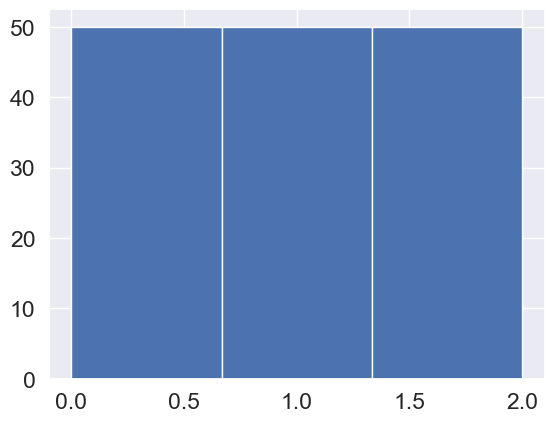

In [21]:
plt.hist(y, bins=len(np.unique(y)));

Получается, что мы имеем одинаковое кол-во элементов каждого класса. Предположите, чем будет плоха сильная дисбаллансировка классов.

**Ответ:** Мы уже несколько раз встречались с дисбалансировкой классов, что приводило к большему вклад в обучение модели в случае более представленного класса, поэтому используем балансировку.

Сопоставим каждому классу цвет.

In [25]:
colors = ListedColormap(['#FF3300', '#0099CC', '#00CC66'])


Посмотрим на данные.

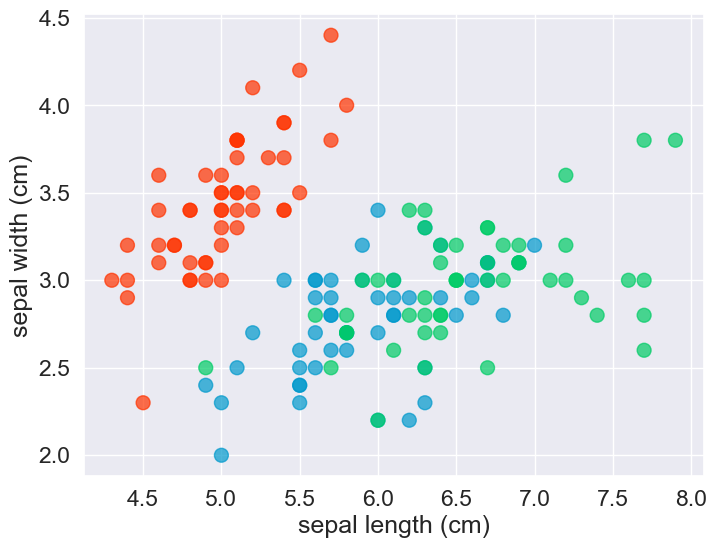

In [28]:
plt.figure(figsize=(8, 6))
grid_x1 = X[:, 0]
grid_x2 = X[:, 1]
plt.scatter(grid_x1, grid_x2, c=y, cmap=colors, s=100, alpha=0.7)
plt.xlabel(data['feature_names'][0])
plt.ylabel(data['feature_names'][1]);

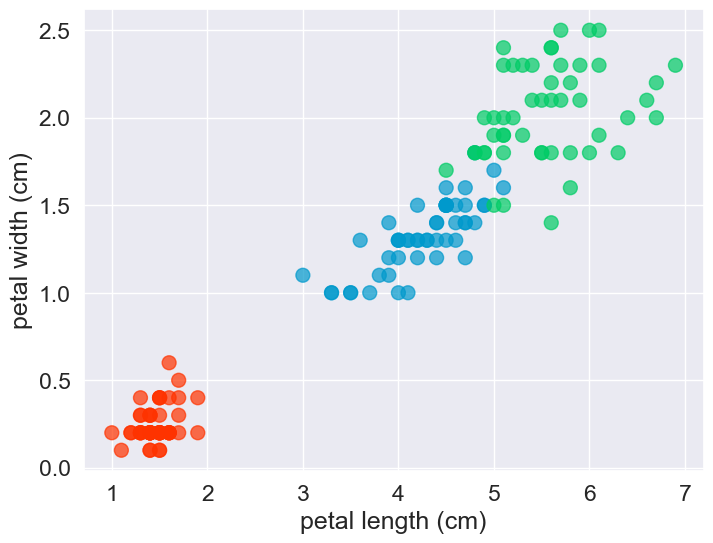

In [30]:
plt.figure(figsize=(8, 6))
grid_x1 = X[:, 2]
grid_x2 = X[:, 3]
plt.scatter(grid_x1, grid_x2, c=y, cmap=colors, s=100, alpha=0.7)
plt.xlabel(data['feature_names'][2])
plt.ylabel(data['feature_names'][3]);

Какой вывод можно сделать из полученных графиков?

**Ответ:** Что лучше разделять по petal, чем по sepal

Разделим выборку на обучающую и тестовую

In [52]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=777
)

Инициализируем и обучим решающее дерево для классификации.

In [55]:
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

Выведите параметры дерева с помощью функции `get_params()`.


In [58]:
clf.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': 42,
 'splitter': 'best'}

Сделаем предсказание и оценим качество модели.

In [61]:
predictions = clf.predict(X_test)
print('test accuracy:', accuracy_score(predictions, y_test))

test accuracy: 0.9777777777777777


Визуализируйте дерево с помощью `sklearn.tree.plot_tree()`.

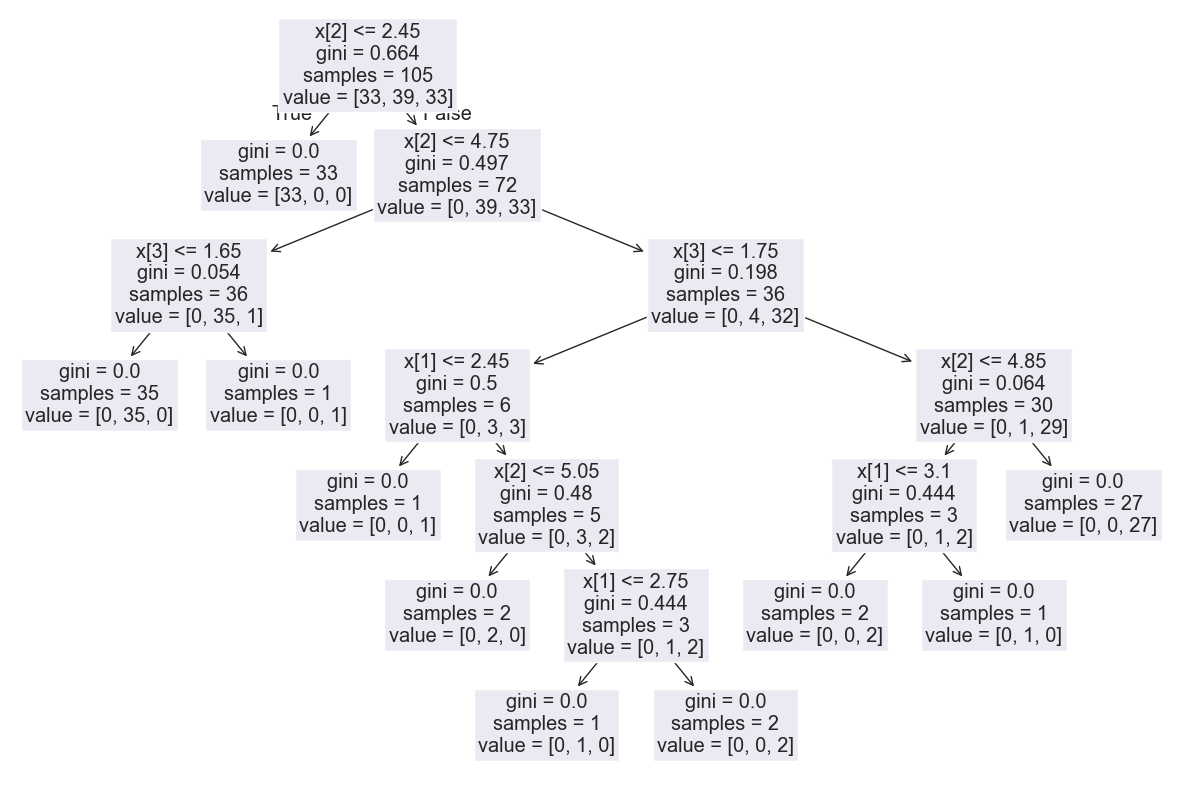

In [64]:
plt.figure(figsize=(15, 10))
tree.plot_tree(clf)
plt.show()

Поменяйте параметр max_depth, заново обучите классификатор и визуализируйте получившееся дерево/деревья. Сделайте вывод - за что отвечает параметр?

test accuracy: 0.9777777777777777


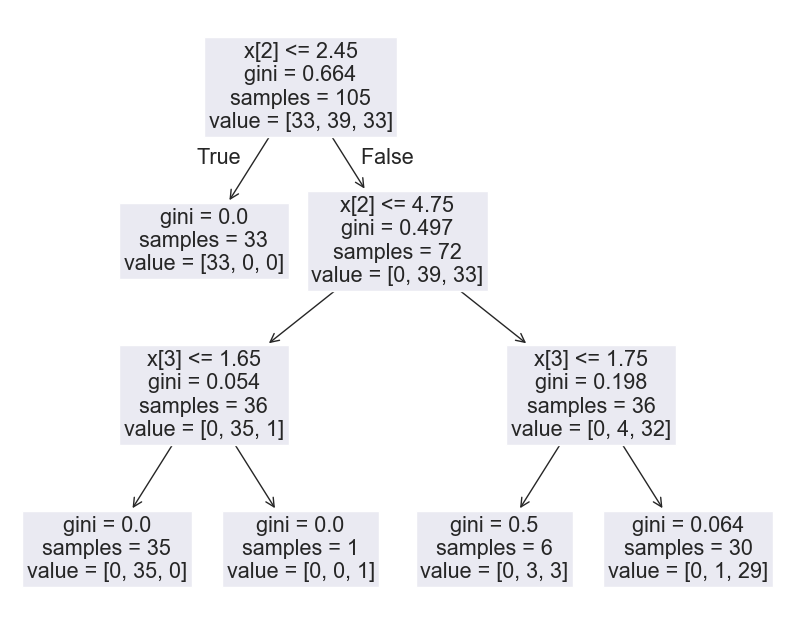

In [69]:
clf_small_depth = DecisionTreeClassifier(random_state=42, max_depth = 3)
clf_small_depth.fit(X_train, y_train)

predictions_small_depth = clf_small_depth.predict(X_test)
print('test accuracy:', accuracy_score(predictions_small_depth, y_test))

plt.figure(figsize=(10, 8))
tree.plot_tree(clf_small_depth)
plt.show()

**Ответ:** Этот параметр буквально отвечает за то, чем называется - изменяет глубину дерева, т.е. максимальное количество уровней от корневого узла до самого дальнего листового узла

Сделайте то же для параметры min_samples_leaf. За что он отвечает?


test accuracy: 0.9555555555555556


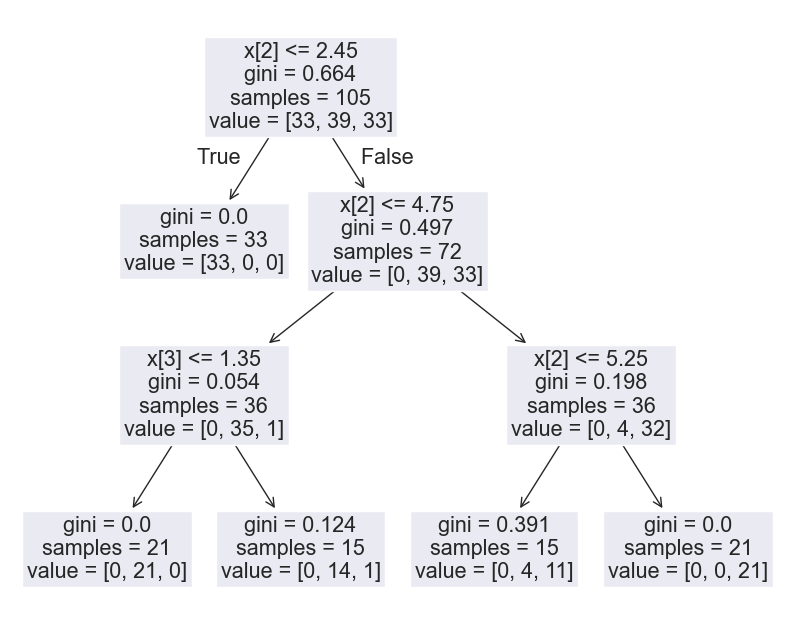

In [74]:
clf_small_samples_leaf = DecisionTreeClassifier(random_state=42, min_samples_leaf = 15)
clf_small_samples_leaf.fit(X_train, y_train)

predictions_small_samples_leaf = clf_small_samples_leaf.predict(X_test)
print('test accuracy:', accuracy_score(predictions_small_samples_leaf, y_test))

plt.figure(figsize=(10, 8))
tree.plot_tree(clf_small_samples_leaf)
plt.show()

**Ответ:** Здесь мы контролируем минимальное количество samples в листах. Таким образом мы предотвращаем например слишком мелкое разбиение